### Measures of Central Tendency

Measures of central tendency memberikan ringkasan statistik di pusat distribusi tertentu, alias, nilai "rata-rata" dari distribusi.

#### Mean

Measure of central tendency yang paling umum adalah "rata-rata" atau **mean**, sering dilambangkan dengan $\mu$ (population) atau $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

Expected value sebenarnya adalah *mean* jangka panjang dari beberapa fungsi (yaitu, $\mu = \mathbb{E}$). Mari kita hitung seberapa dekat rata-rata sampel, $\bar{x}$, dari eksperimen lempar lima koin kita dengan nilai yang diharapkan, $\mathbb{E} = 2.5$.

In [1]:
import numpy as np

n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

In [ ]:
len(heads_count)

1000

In [ ]:
heads_count[0:20]

array([4, 5, 4, 2, 4, 4, 2, 4, 1, 3, 2, 1, 1, 3, 2, 3, 1, 2, 3, 3])

In [ ]:
sum(heads_count)/len(heads_count)

2.508

Selain itu NumPy hadir dengan fungsi bawaan:

In [ ]:
np.mean(heads_count)

2.508

In [ ]:
heads_count.mean()

2.508

#### Median

Measures of Central Tendency kedua yang paling umum adalah **median**, nilai titik tengah dalam distribusi:

In [ ]:
import numpy as np

n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

In [ ]:
len(heads_count)

1000

In [ ]:
heads_count.sort()

In [ ]:
heads_count[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
len(heads_count)

1000

Dengan jumlah nilai ganjil dalam distribusi, kita akan mendapatkan titik tengah tunggal sebagai median, misalnya, titik tengah dari sorted array `[2, 4, 6, 9, 10]` adalah enam.

Dengan angka genap, kita akan akan mendapatkan titik tengah dengan mengambil rata-rata dari dua nilai yang berada di titik tengah:

In [ ]:
heads_count[499]

3

In [ ]:
heads_count[500]

3

Mendapatkan titik tengah dengan mengambil rata-rata dari dua nilai yang berada di titik tengah:

In [ ]:
(2+2)/2

2.0

Selain itu NumPy hadir dengan fungsi bawaan:

In [ ]:
np.median(heads_count)

3.0

#### Mode

**Mode** adalah ukuran umum akhir dari measure of central tendency. Ini hanyalah nilai dalam distribusi yang paling sering muncul.

Seperti yang ditampilkan pada grafik, dalam kasus percobaan lemparan lima koin yang kita lakukan modenya adalah tiga.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

In [ ]:
len(heads_count)

1000

Metode yang tersedia untuk menghitung mode ada pada SciPy `stats`:

In [ ]:
import scipy.stats as st

In [ ]:
st.mode(heads_count)

ModeResult(mode=array([2]), count=array([326]))

In [ ]:
st.mode(heads_count)[0][0]

2

Dengan ukuran sampel yang kecil, rata-rata biasanya memberikan ukuran tendensi sentral yang paling akurat.

Dengan ukuran sampel yang lebih besar, mean, median, dan modus akan cenderung bertepatan, selama distribusinya tidak miring (skewed):

In [ ]:
x = st.skewnorm.rvs(0, size=1000)

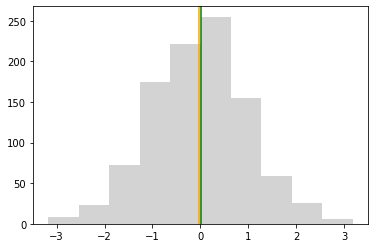

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

Pada distribusi yang miring (skewed), sebaliknya, rata-rata akan menjauh dari pusat dan menuju ke arah ekor:

In [ ]:
x = st.skewnorm.rvs(10, size=1000) 

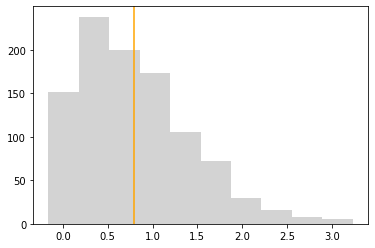

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

### Quantiles

Median, yang membagi distribusi menjadi dua di titik tengahnya, adalah contoh Quantiles yang paling terkenal:

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Generate random variates

In [ ]:
x = st.skewnorm.rvs(10, size=1000) 

In [ ]:
np.median(x)

0.6995477319267009

In [ ]:
np.quantile(x, 0.5)

0.6995477319267009

Secara umum, kuantil membagi distribusi dan yang paling umum adalah:

* Percentiles, 
* Quartiles, dan
* Deciles.

**Persentil** membagi distribusi pada titik mana pun dari seratus persen. Misalnya, jika kita ingin mengidentifikasi ambang batas untuk 5% teratas dari suatu distribusi, kita akan memotongnya pada persentil ke-95. Atau, untuk 1% teratas, kita akan memotong pada persentil ke-99.

In [ ]:
p = np.percentile(x, [95, 99])
p

array([2.02233437, 2.9071354 ])

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

Error in callback <function flush_figures at 0x7f5c6f26e050> (for post_execute):


KeyboardInterrupt: ignored

Perhatikan bahwa metode `quantile()` dari NumPy identik dengan metode `percentile()` kecuali kita meneruskan proporsi (mulai dari nol hingga satu) ke yang pertama dan persentase (mulai dari nol hingga 100) ke yang terakhir:

In [ ]:
np.quantile(x, [.95, .99])

array([2.02233437, 2.9071354 ])

**Quartiles**, seperti namanya, adalah quartiles yang membagi distribusi menjadi empat bagian dengan membagi distribusi pada persentil ke-25, median (alias persentil ke-50), dan persentil ke-75:

In [ ]:
q = np.percentile(x, [25, 50, 75])
q

array([0.32651239, 0.69954773, 1.1676406 ])

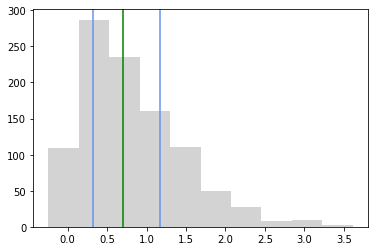

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

Terakhir, **deciles** (dari bahasa Latin *decimus*, yang berarti "kesepuluh") membagi distribusi menjadi sepuluh segmen berukuran sama:

In [ ]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [ ]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.13249197, 0.25074122, 0.39171593, 0.53367595, 0.69954773,
       0.86374568, 1.03804543, 1.32993537, 1.67724593])

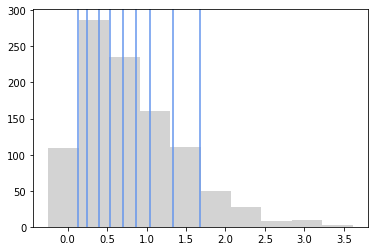

In [ ]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')

Sebagai contoh, kita dapat menyebut 10% terbawah sebagai deciles bawah atau deciles pertama, sedangkan 10% teratas adalah deciles atas atau deciles kesepuluh.

### The Box-and-Whisker Plot

Box-and-Whisker Plot didefinisikan sebagai metode grafis untuk menampilkan variasi dalam satu set data. Dalam kebanyakan kasus, analisis histogram memberikan tampilan yang memadai, tetapi Box-and-Whisker Plot dapat memberikan detail tambahan dalam grafik yang sama.

In [ ]:
import seaborn as sns
import scipy.stats as st
import numpy as np

Generate random variates

In [ ]:
x = st.skewnorm.rvs(10, size=1000) 

In [ ]:
sns.set(style='whitegrid')

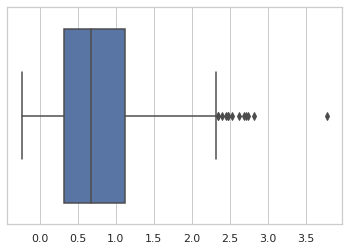

In [ ]:
_ = sns.boxplot(x=x)

Tepi kotak dan median ditentukan oleh quartiles:

In [ ]:
q = np.percentile(x, [25, 50, 75])
q

array([0.31400792, 0.67565601, 1.12595371])

Tepi kotak (box edges) menentukan **inter-quartile range** (IQR):

In [ ]:
r = 1.194 - 0.325
r

0.869

Whisker lengths ditentukan oleh titik data terjauh dalam $1,5 \times \text{IQR}$ dari tepi kotak.

Dalam hal ini, whisker bawah dapat meregang ke bawah (ke kiri dalam plot) seperti:

In [ ]:
0.325 - 1.5*r

-0.9785000000000001

Nilai terendah ada di dalamnya sehingga whisker diplot di mana nilai terendah itu adalah:

In [ ]:
np.min(x)

-0.23151802877971503

Whisker bagian atas bisa meregang sejauh (ke kanan di plot) sebagai:

In [ ]:
1.194 + 1.5*r

2.4975

Ada beberapa (sebelas) nilai di luar ambang batas ini dalam distribusi. Nilai-nilai ini dianggap **outliers** dan diplot sebagai poin individual:

In [ ]:
x.sort()

In [ ]:
x[-15:]

array([2.31861525, 2.32305923, 2.34457565, 2.34660603, 2.39558382,
       2.45211695, 2.47494873, 2.47784414, 2.53188108, 2.62413658,
       2.69067132, 2.71127985, 2.74202016, 2.81700049, 3.7798018 ])

Nilai tertinggi kedua belas, 2,435, adalah yang terbesar dalam jangkauan maksimum whisker atas sehingga whisker atas diplot di sana.

Berguna untuk memeriksa distribusi, plot box-and-whisker sangat membantu untuk membandingkan distribusi:

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


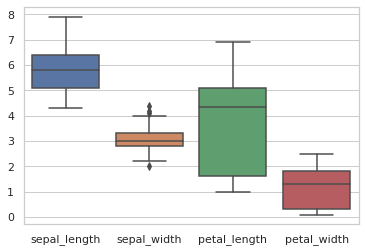

In [ ]:
_ = sns.boxplot(data=iris)

In [ ]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


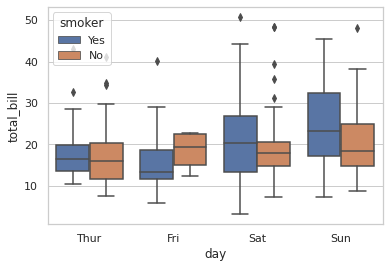

In [ ]:
_ = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)

### Measures of Dispersion

IQR adalah ukuran penyebaran nilai yang relatif jarang di sekitar pusat distribusi. Teknik yang paling banyak digunakan adalah:

* Varian,
* Standar deviasi, dan
* Kesalahan standar.

#### Variance

**Variance** (dilambangkan dengan $\sigma^2$) dapat ditulis menggunakan notasi expected-value:
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [ ]:
import seaborn as sns
import scipy.stats as st
import numpy as np

Generate random variates

In [ ]:
x = st.skewnorm.rvs(10, size=1000) 

Sebagai contoh mari kita hitung varians dari `x`:

In [ ]:
xbar = np.mean(x)
xbar

0.7848091607236262

In [ ]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [ ]:
squared_differences[0:10]

[0.0761252865379639,
 0.32619973216363823,
 6.613258530498781,
 0.13680723922028384,
 0.001401668518303016,
 0.06757534919920699,
 0.14012377817513205,
 0.0033487645464322312,
 0.06348239868475677,
 0.08053514225430922]

In [ ]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.3984413131589052

Selain itu NumPy hadir dengan fungsi bawaan:

In [ ]:
np.var(x)

0.3984413131589048

#### Standard Deviation

Turunan langsung dari varians adalah **standar deviasi** (dilambangkan dengan $\sigma$), yang sesuai karena unitnya berada pada skala yang sama dengan nilai dalam distribusi:
$$ \sigma = \sqrt{\sigma^2} $$

Terlebih dahulu jalankan perintah yang sudah dijalankan sebelumnya:

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

x = st.skewnorm.rvs(10, size=1000) 

xbar = np.mean(x)

squared_differences = [(x_i - xbar)**2 for x_i in x]

sigma_squared = sum(squared_differences)/len(x)

Lalu jalankan Standard Deviation

In [ ]:
sigma = sigma_squared**(1/2)
sigma

0.6315330841088016

Selain itu NumPy hadir dengan fungsi bawaan:

In [ ]:
np.std(x)

0.631533084108802

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

Derivation  lebih lanjut dari Standard Deviation adalah **standard error**, yang dinotasikan dengan $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

Terlebih dahulu jalankan perintah yang sudah dijalankan sebelumnya:

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

x = st.skewnorm.rvs(10, size=1000) 

xbar = np.mean(x)

squared_differences = [(x_i - xbar)**2 for x_i in x]

sigma_squared = sum(squared_differences)/len(x)

Lalu jalankan Standard Deviation

In [ ]:
sigma = sigma_squared**(1/2)
sigma

Setelah itu jalankan Standard Error

In [ ]:
sigma/(len(x))**(1/2)

Selain itu Scipy hadir dengan fungsi bawaan:

In [1]:
st.sem(x)

2.27980939207591

Standard Error memungkinkan kita untuk membandingkan apakah rata-rata dari dua distribusi berbeda *secara signifikan*.

### Measures of Relatedness

Jika kita memiliki dua vektor dengan panjang yang sama, $x$ dan $y$, di mana setiap elemen $x$ dipasangkan dengan elemen $y$ yang sesuai, **covariance** memberikan ukuran seberapa terkait variabel tersebut satu sama lain:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [ ]:
import seaborn as sns
import scipy.stats as st
import numpy as np

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = iris.sepal_length
y = iris.petal_length

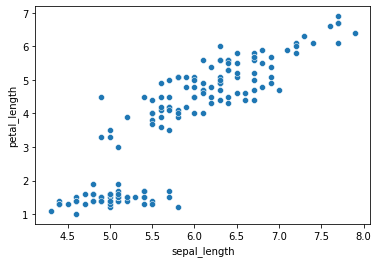

In [ ]:
_ = sns.scatterplot(x=x, y=y)

In [ ]:
n = len(x)

In [ ]:
xbar = sum(x)/n
ybar = sum(y)/n

In [ ]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(product)/n
cov

1.2658199999999995

Fungsi NumPy `cov()` mengembalikan **ovariance matrix**, yang merupakan matriks $2 \times 2$ karena $x$ dan $y$ bersama-sama menggambarkan ruang dua dimensi:

In [ ]:
np.cov(x, y, ddof=0)

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

Elemen diagonal dari covariance matrix masing-masing mewakili varians dari $x$ dan $y$:

In [ ]:
np.var(x)

0.6811222222222223

In [ ]:
np.var(y)

3.0955026666666665

Jika $x$ dan $y$ berhubungan terbalik, covariance nya negatif. Semakin sedikit hubungannya, semakin dekat covariance nya ke nol:

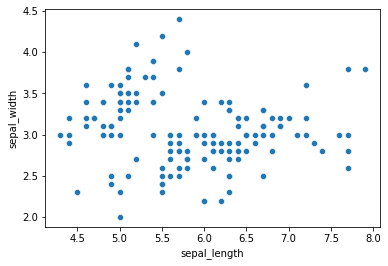

In [ ]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [ ]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

#### Correlation

Kelemahan covariance adalah bahwa hal itu mengacaukan skala relatif dua variabel dengan ukuran keterkaitan variabel. **Correlation** dibangun di atas covariance dan mengatasi kelemahan ini melalui penskalaan ulang, sehingga mengukur keterkaitan secara eksklusif. Correlation jauh lebih umum karena perbedaan ini.

Koefisien correlation (dikembangkan oleh Karl Pearson pada abad ke-20 meskipun dikenal pada abad ke-19) sering dilambangkan dengan $r$ atau $\rho$ dan didefinisikan oleh:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [ ]:
import scipy.stats as st
import seaborn as sns

In [ ]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

In [ ]:
sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

In [ ]:
cov / (sigma_x * sigma_y)

-0.11756978087951572

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

(-0.11756978413300206, 0.15189826071144766)


Output nilai kedua dari `pearsonr` adalah ukuran signifikansi statistik.

$\rho$ memiliki rentang -1 hingga 1, dengan nilai yang mendekati nol menunjukkan korelasi yang lebih sedikit:

In [ ]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

-0.11756978413300206

 
Semakin dekat $\rho$ ke 1 atau -1, maka semakin kuat korelasi positif atau negatifnya:

In [ ]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865831